# <font color='blus'>Table of contents</font>

In [5]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="Result issued from biais metrics")

# <font color='blus'>Abstract</font>

    This notebook implement both data-preparation and CNN model building provided from 
    Kaggle : https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/overview/evaluation
    
    It is used in order to compare bias performances and classification performances of submission model (the one submitted for Kaggle competition) with the one delivered by Kaggle (benchmark model).

# <font color='blus'>Software engineering</font>
<img src="./img/SoftwareEngineeringBenchmark.png">

# <font color='blus'>1. Benchmark algorithm</font>

In [1]:
from sklearn import metrics
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
import p9_util_benchmark
p9_util_benchmark.dict_param_benchmark

{'root_directory': './data/benchmark/',
 'format_file': '.dill',
 'format_model': '.h5',
 'root_filename_benchmark': './data/benchmark/df_sample_benchmark_',
 'root_filename_model': 'model_jigsaw_',
 'n_sample': None,
 'n_sample_train': None,
 'is_dataset_reloaded': False,
 'model_type': 'benchmark',
 'is_model_reloaded': False,
 'is_embedding_layer': True,
 'threshold': 0.5,
 'embeddings_dimension': 100,
 'val_score_max': True,
 'epochs': 10}

In [4]:
import p9_util_config
p9_util_config.dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (250, 100),
  'batch_size': 5000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 5e-05,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

## <font color='blus'>1.1 Data preparation</font>
    
    Depending configuration parameters from p9_util_benchmark.dict_param_benchmark, data is prepared 
    or prepared data is read from hard drive.
    

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection

import keras

import p5_util
import p9_util_benchmark

filename = './data/benchmark/model_jigsaw_benchmark.h5'

n_sample = p9_util_benchmark.dict_param_benchmark['n_sample']
filename_benchmark = p9_util_benchmark.build_filename_benchmark()
print(n_sample,filename_benchmark)

#-------------------------------------------------------------------------------
# Loading or building dataset
#-------------------------------------------------------------------------------
if p9_util_benchmark.dict_param_benchmark['is_dataset_reloaded'] :
   
    #-------------------------------------------------------------
    # Load validation dataframe for benchmark
    #-------------------------------------------------------------
    df_validate = p5_util.object_load(filename_benchmark)
    
    #-------------------------------------------------------------
    # Load text tokenizer for data-preparation.
    #-------------------------------------------------------------
    tokenizer = p5_util.object_load(p9_util_benchmark.build_filename_tokenizer())
else :
    #-------------------------------------------------------------
    # Build dataset for train and validation, 
    #-------------------------------------------------------------
    df_train = pd.read_csv('./data/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
    df_train['comment_text'] = df_train['comment_text'].apply(lambda x : x.lower())
    df_train['comment_text'] = df_train['comment_text'].astype(str)

    df_train = p9_util_benchmark.convert_dataframe_to_bool(df_train, \
                                                           dict_param_benchmark_=p9_util_benchmark.dict_param_benchmark)

    df_train, df_validate = model_selection.train_test_split(df_train, test_size=0.2)
    print('%d train comments, %d validation comments' % (len(df_train), len(df_validate)))
    
    #-------------------------------------------------------------
    # Save validation dataset into a file.
    #-------------------------------------------------------------
    filename_valid_dataset = p9_util_benchmark.build_filename_benchmark()
    p5_util.object_dump(df_validate.sample(n_sample),filename_valid_dataset,is_verbose=True )
    
    #-------------------------------------------------------------
    # Save train dataset into a file.
    #-------------------------------------------------------------
    filename_train_dataset = p9_util_benchmark.build_filename_benchmark(is_train=True)
    p5_util.object_dump(df_train,filename_train_dataset,is_verbose=True )
    
    #-------------------------------------------------------------
    # Create a text tokenizer and save it.
    #-------------------------------------------------------------
    tokenizer = Tokenizer(num_words=p9_util_benchmark.MAX_NUM_WORDS)
    tokenizer.fit_on_texts(df_train[p9_util_benchmark.TEXT_COLUMN])
    filename_tokenizer = p9_util_benchmark.build_filename_tokenizer()
    p5_util.object_dump(tokenizer,filename_tokenizer, is_verbose=True )
    
    #-------------------------------------------------------------
    # Save parameters configuration into a file.
    #-------------------------------------------------------------
    filename_param = p9_util_benchmark.build_filename_param(p9_util_benchmark.dict_param_benchmark)
    p5_util.object_dump(p9_util_benchmark.dict_param_benchmark,filename_param, is_verbose=True )

## <font color='blus'>1.2 Model from benchmark </font>
    
    Depending configuration parameters from p9_util_benchmark.dict_param_benchmark, model is built 
    or model is read from hard drive.
    

In [10]:
import p5_util
import p9_util_benchmark

#-------------------------------------------------------------------------------
# Loading or building model
#-------------------------------------------------------------------------------    
if p9_util_benchmark.dict_param_benchmark['is_model_reloaded'] :
    #-------------------------------------------------------------
    # Load benchmark model.
    #-------------------------------------------------------------
    filename_model = p9_util_benchmark.build_filename_model()
    print("Loding model= {}".format(filename_model))
    model = keras.models.load_model(filename_model)
else :
    #-------------------------------------------------------------
    # Build benchmark model then save it.
    #-------------------------------------------------------------
    model,list_callback = p9_util_benchmark.build_model(p9_util_benchmark.dict_param_benchmark, \
                                                        p9_util_config.dict_param_keras_cnn)
    #model = p9_util_benchmark.train_benchmark_model(df_train, df_validate, tokenizer)

    filename_model = p9_util_benchmark.build_filename_model()
    model.save(filename_model)
    
        

p5_util.object_load : fileName= ./data/benchmark/tokenizer_FULL.dill


W1028 13:38:04.026567 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1028 13:38:04.027397 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Loading embeddings...
Building embeddings...
object_dump: file name= ./data/benchmark/embedding_matrix_100D_FULL.dill


W1028 13:38:13.573556 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1028 13:38:13.590693 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1028 13:38:13.591259 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1028 13:38:14.097848 140607304697664 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          35324100  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 128)          25728     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 128)           65664     
__________

In [12]:
p9_util_config.dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (250, 100),
  'batch_size': 5000,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 5e-05,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

In [13]:
import p9_util_benchmark
model, history = p9_util_benchmark.train_benchmark_model(model, df_train, df_validate, tokenizer,
                                                         dict_param_keras_cnn=p9_util_config.dict_param_keras_cnn,
                                                        list_callback = list_callback)

Data preparation...
Model training...
Train on 1443899 samples, validate on 360975 samples
Epoch 1/10
1443899/1443899 [==============================] - 1171s 811us/step - loss: 0.1969 - acc: 0.9322 - val_loss: 0.1707 - val_acc: 0.9391

Epoch 00001: val_acc improved from -inf to 0.93910, saving model to ./data/benchmark/model_jigsaw_benchmark_sampleFULL_threshold0.5_best.h5
Epoch 2/10
1443899/1443899 [==============================] - 1164s 806us/step - loss: 0.1654 - acc: 0.9413 - val_loss: 0.1584 - val_acc: 0.9432

Epoch 00002: val_acc improved from 0.93910 to 0.94320, saving model to ./data/benchmark/model_jigsaw_benchmark_sampleFULL_threshold0.5_best.h5
Epoch 3/10
1443899/1443899 [==============================] - 795s 551us/step - loss: 0.1575 - acc: 0.9438 - val_loss: 0.1556 - val_acc: 0.9443

Epoch 00003: val_acc improved from 0.94320 to 0.94433, saving model to ./data/benchmark/model_jigsaw_benchmark_sampleFULL_threshold0.5_best.h5
Epoch 4/10
1443899/1443899 [==================

    History from trained model is saved 

In [15]:
import p5_util
import p9_util_benchmark

filename_history = p9_util_benchmark.build_filename_history(p9_util_benchmark.dict_param_benchmark)
p5_util.object_dump(history,filename_history, is_verbose=True)

object_dump: file name= ./data/benchmark/history_benchmark_100D_FULL_.dill


    Predictions are applied over validation dataset.

In [17]:
import p9_util_benchmark
MODEL_NAME = 'my_model'
df_validate[MODEL_NAME] = model.predict(p9_util_benchmark.pad_text(df_validate[p9_util_benchmark.TEXT_COLUMN], tokenizer))[:, 1]

In [34]:
df_validate.sample(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,my_model
44381,296033,False,why are usa prisons not like dennmark prisons....,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,2,0,0.0,0,4,0.137376
878357,5195332,False,"whether it's 75% or 83%, women are still being...",0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,...,approved,0,0,0,2,1,0.0,10,6,0.043060
1798596,6325481,False,"as is proven on this site every hour, the 'fac...",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,approved,0,0,0,0,0,0.0,4,4,0.004993
1148701,5521009,False,"chris, your last sentence was an awful ending ...",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,approved,0,0,0,1,2,0.0,4,4,0.085857
1113393,5476762,False,i must have made you really mad because your c...,0.0,0.0,0.000000,0.200000,0.0,0.0,0.0,...,approved,0,0,0,0,0,0.0,4,5,0.064825
388406,718007,False,"what is a ""phone service""?",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,approved,2,0,0,0,0,0.0,0,4,0.025606
366372,691692,False,i'm not an environmentalist - just a trade opp...,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,6,0.018966
1690128,6194260,False,the latter part of that is actually a pretty g...,0.0,0.0,0.000000,0.000000,0.0,0.7,0.0,...,approved,0,0,1,2,1,0.0,10,4,0.005961
1751848,6269536,False,"yes bible thumping, country music loving repub...",0.0,0.0,0.166667,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,6,0.012523
547146,912524,False,"good piece.\nevery downside has an upside, i s...",0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,4,0.012758


## <font color='blus'>1.3 Bias computation </font>    

In [20]:
import p9_util_metrics
df_bias_metrics = p9_util_metrics.compute_bias_metrics_for_model(df_validate, p9_util_metrics.IDENTITY_COLUMNS, MODEL_NAME, p9_util_benchmark.TOXICITY_COLUMN)
df_bias_metrics

,bnsp_auc,bpsn_auc,subgroup,subgroup_auc,subgroup_size
2,0.952807,0.767863,homosexual_gay_or_lesbian,0.788041,2135
6,0.960977,0.748417,black,0.792847,3001
7,0.962681,0.757616,white,0.811616,4959
5,0.948681,0.807307,muslim,0.819371,4194
4,0.944562,0.857550,jewish,0.863823,1527
8,0.945844,0.845364,psychiatric_or_mental_illness,0.866300,980
1,0.935858,0.872772,female,0.868616,10770
0,0.943378,0.861892,male,0.872911,8854
3,0.924033,0.907914,christian,0.895548,8041


In [21]:
import p9_util_metrics
overall_auc = p9_util_metrics.calculate_overall_auc(df_validate, MODEL_NAME, p9_util_metrics.TOXICITY_COLUMN)
overall_auc

0.9308685863411208

In [22]:
import p9_util_metrics

p9_util_metrics.get_final_metric(df_bias_metrics, overall_auc)

Bias score contribution : 0.6494566751288194


0.8821738217140996

## <font color='blus'>1.4 Binay classification performances </font>    

In [25]:
X_valid = p9_util_benchmark.pad_text(df_validate[p9_util_benchmark.TEXT_COLUMN], tokenizer, \
                                     dict_param_keras_cnn=p9_util_config.dict_param_keras_cnn)

[0, 1]

Confusion matrix for all classes : 

[[332106      1]
 [ 28868      0]]

Normalized confusion matrix
[[9.99996989e-01 3.01107776e-06]
 [1.00000000e+00 0.00000000e+00]]
Confusion matrix, without normalization
[[332106      1]
 [ 28868      0]]

TP rate = [0. 0. 1.]
FP rate = [0.00000000e+00 3.01107776e-06 1.00000000e+00]
AUC = 0.4999984944611225


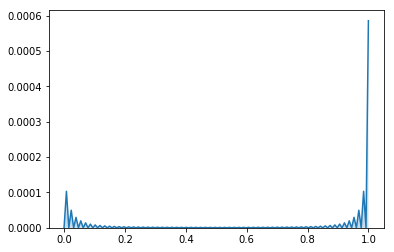

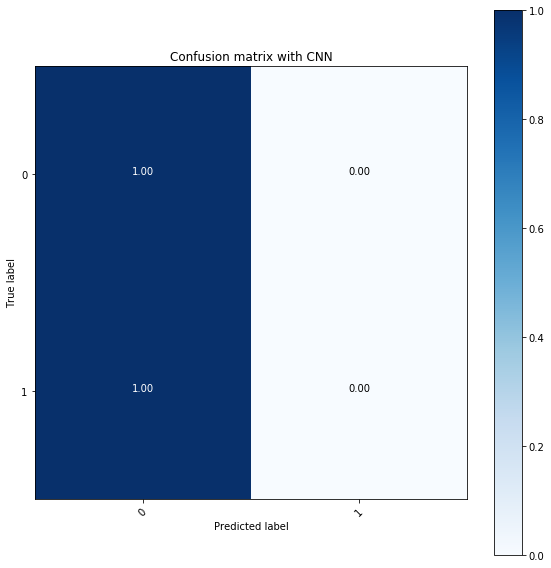

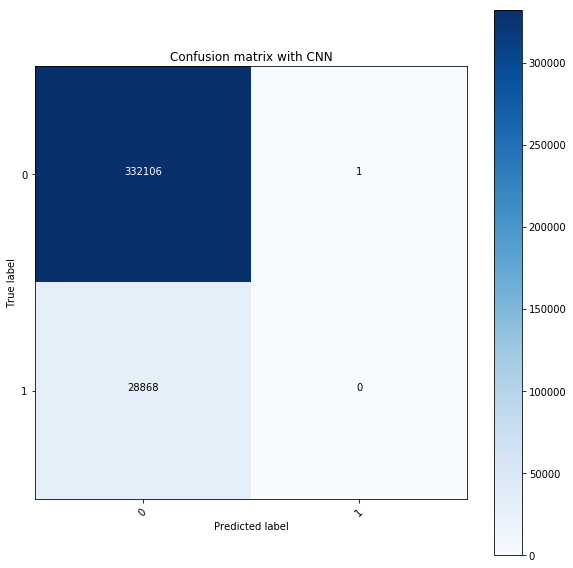

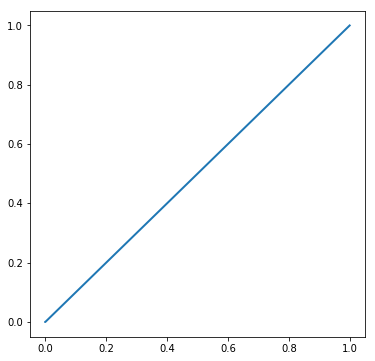

In [31]:
import p9_util

y_= p9_util.display_class_performance(model, X_valid, df_validate.target.values.astype(int), is_binary=True, \
                                      y_pred=df_validate[MODEL_NAME].values.astype(int), \
                                      title="Confusion matrix with CNN", nb_classes=2)

# <font color='blus'>2. Submission algorithm</font>

    Submission algorithm is compared with benchmark algorithm using benchmark data-preparation.
    
    Switching from benchmark algorithm to submission is achieved thanks to model_type parameter 
    inside p9_util_benchmark.dict_param_benchmark configuration.
    

In [1]:
from sklearn import metrics
%matplotlib inline

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import p9_util_benchmark
p9_util_benchmark.dict_param_benchmark

Using TensorFlow backend.
W1028 22:43:49.981447 139793497954112 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1028 22:43:49.982389 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/adanet/tf_compat/__init__.py:96: The name tf.losses.Reduction is deprecated. Please use tf.compat.v1.losses.Reduction instead.

W1028 22:43:50.002742 139793497954112 deprecation_wrapper.py:119] From /home/bangui/Dropbox/Perso/Formation/openclassrooms/OC_Datascientist/Kaggle/p8_util_config.py:137: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



{'root_directory': './data/benchmark/',
 'format_file': '.dill',
 'format_model': '.h5',
 'root_filename_benchmark': './data/benchmark/df_sample_benchmark_',
 'root_filename_model': 'model_jigsaw_',
 'n_sample': None,
 'n_sample_train': None,
 'is_dataset_reloaded': True,
 'model_type': 'submission',
 'is_model_reloaded': False,
 'is_embedding_layer': True,
 'threshold': 0.5,
 'embeddings_dimension': 100,
 'val_score_max': True,
 'epochs': 10}

In [3]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn import model_selection

import keras

import p5_util
import p9_util_benchmark

filename = './data/benchmark/model_jigsaw_benchmark.h5'

n_sample = p9_util_benchmark.dict_param_benchmark['n_sample']
filename_benchmark = p9_util_benchmark.build_filename_benchmark()
print(n_sample,filename_benchmark)

#-------------------------------------------------------------------------------
# Loading or building dataset
#-------------------------------------------------------------------------------
if p9_util_benchmark.dict_param_benchmark['is_dataset_reloaded'] :
   
    #-------------------------------------------------------------
    # Load validation dataframe
    #-------------------------------------------------------------
    filename_valid_dataset = p9_util_benchmark.build_filename_benchmark()
    df_validate = p5_util.object_load(filename_valid_dataset)

    #-------------------------------------------------------------
    # Load train dataframe
    #-------------------------------------------------------------
    filename_train_dataset = p9_util_benchmark.build_filename_benchmark(is_train=True)    
    df_train = p5_util.object_load(filename_train_dataset)
    
    #-------------------------------------------------------------
    # Load text tokenizer for data-preparation.
    #-------------------------------------------------------------
    tokenizer = p5_util.object_load(p9_util_benchmark.build_filename_tokenizer())
else :
    #-------------------------------------------------------------
    # Build dataset for train and validation, 
    #-------------------------------------------------------------
    df_train = pd.read_csv('./data/train.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
    df_train['comment_text'] = df_train['comment_text'].apply(lambda x : x.lower())
    df_train['comment_text'] = df_train['comment_text'].astype(str)

    df_train = p9_util_benchmark.convert_dataframe_to_bool(df_train, \
                                                           dict_param_benchmark_=p9_util_benchmark.dict_param_benchmark)

    df_train, df_validate = model_selection.train_test_split(df_train, test_size=0.2)
    print('%d train comments, %d validation comments' % (len(df_train), len(df_validate)))
    
    #-------------------------------------------------------------
    # Save validation dataset into a file.
    #-------------------------------------------------------------
    if n_sample is None :
        n_sample = len(df_validate)
    else :
        pass    
    filename_valid_dataset = p9_util_benchmark.build_filename_benchmark()
    p5_util.object_dump(df_validate.sample(n_sample),filename_valid_dataset,is_verbose=True )
    
    #-------------------------------------------------------------
    # Save train dataset into a file.
    #-------------------------------------------------------------
    filename_train_dataset = p9_util_benchmark.build_filename_benchmark(is_train=True)
    p5_util.object_dump(df_train,filename_train_dataset,is_verbose=True )
    
    #-------------------------------------------------------------
    # Create a text tokenizer and save it.
    #-------------------------------------------------------------
    tokenizer = Tokenizer(num_words=p9_util_benchmark.MAX_NUM_WORDS)
    tokenizer.fit_on_texts(df_train[p9_util_benchmark.TEXT_COLUMN])
    filename_tokenizer = p9_util_benchmark.build_filename_tokenizer()
    p5_util.object_dump(tokenizer,filename_tokenizer, is_verbose=True )
    
    #-------------------------------------------------------------
    # Save parameters configuration into a file.
    #-------------------------------------------------------------
    filename_param = p9_util_benchmark.build_filename_param(p9_util_benchmark.dict_param_benchmark)
    p5_util.object_dump(p9_util_benchmark.dict_param_benchmark,filename_param, is_verbose=True )

None ./data/benchmark/df_sample_benchmark_valid_FULL.dill
p5_util.object_load : fileName= ./data/benchmark/df_sample_benchmark_valid_FULL.dill
p5_util.object_load : fileName= ./data/benchmark/df_sample_benchmark_train_FULL.dill
p5_util.object_load : fileName= ./data/benchmark/tokenizer_FULL.dill


    Below is the Keras configuration for CNN model.

In [4]:
import p9_util_config
p9_util_config.dict_param_keras_cnn

{'dict_param_keras': {'input_dim': (250, 100),
  'batch_size': 500,
  'nb_epoch': 10,
  'verbose': 1,
  'dropout_rate': 0.3,
  'regul': (None, None),
  'is_batch_normalized': True,
  'lr': 0.001,
  'nbClasses': 2},
 'filter_size': 3,
 'stride_size': 1,
 'pool_size': 2,
 'pool_stride': 2,
 'nb_filter': 256,
 'conv_layer': 4,
 'nb_dense_neuron': 128,
 'dense_layer': 1,
 'dense_layer_decrease_rate': 1,
 'list_channel': [],
 'list_filter_channel': []}

    Model is loaded from hard-disk.

In [5]:
import keras
import p5_util
import p9_util_benchmark

#-------------------------------------------------------------------------------
# Loading or building model
#-------------------------------------------------------------------------------    
if p9_util_benchmark.dict_param_benchmark['is_model_reloaded'] :
    #-------------------------------------------------------------
    # Load benchmark model.
    #-------------------------------------------------------------
    filename_model = p9_util_benchmark.build_filename_model()
    print("Loding model= {}".format(filename_model))
    model = keras.models.load_model(filename_model)
else :
    #-------------------------------------------------------------
    # Build benchmark model then save it.
    #-------------------------------------------------------------
    model,list_callback = p9_util_benchmark.build_model(p9_util_benchmark.dict_param_benchmark, \
                                                        p9_util_config.dict_param_keras_cnn)
    #model = p9_util_benchmark.train_benchmark_model(df_train, df_validate, tokenizer)

    filename_model = p9_util_benchmark.build_filename_model()
    model.save(filename_model)
    
        

p5_util.object_load : fileName= ./data/benchmark/tokenizer_FULL.dill


W1028 22:44:01.882208 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1028 22:44:01.883948 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Loading embeddings...
Building embeddings...
object_dump: file name= ./data/benchmark/embedding_matrix_100D_FULL.dill


W1028 22:44:11.546623 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1028 22:44:11.569584 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1028 22:44:11.570117 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W1028 22:44:12.182253 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool

<class 'tensorflow.python.framework.ops.Tensor'>


W1028 22:44:12.503062 139793497954112 deprecation.py:506] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1028 22:44:12.591454 139793497954112 deprecation_wrapper.py:119] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1028 22:44:12.614626 139793497954112 deprecation.py:323] From /home/bangui/anaconda3/envs/python36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where i

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          35256200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 100)          400       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 256)          51456     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 256)           1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 256)           196864    
__________

    Model is trained and best model is kept and saved on hard drive.

In [7]:
import p9_util_config
import p9_util_benchmark
model, history = p9_util_benchmark.train_benchmark_model(model, df_train, df_validate, tokenizer,
                                                         dict_param_keras_cnn=p9_util_config.dict_param_keras_cnn,
                                                        list_callback = list_callback)

Data preparation...

Batch size= 500
Model training...
Train on 1443899 samples, validate on 360975 samples
Epoch 1/10
1443899/1443899 [==============================] - 3270s 2ms/step - loss: 0.1650 - acc: 0.9424 - val_loss: 0.1541 - val_acc: 0.9447

Epoch 00001: val_acc improved from -inf to 0.94469, saving model to ./data/benchmark/model_jigsaw_submission_sampleFULL_threshold0.5_best.h5
Epoch 2/10
1443899/1443899 [==============================] - 3467s 2ms/step - loss: 0.1425 - acc: 0.9478 - val_loss: 0.1422 - val_acc: 0.9486

Epoch 00002: val_acc improved from 0.94469 to 0.94864, saving model to ./data/benchmark/model_jigsaw_submission_sampleFULL_threshold0.5_best.h5
Epoch 3/10
1443899/1443899 [==============================] - 3792s 3ms/step - loss: 0.1381 - acc: 0.9490 - val_loss: 0.1453 - val_acc: 0.9468

Epoch 00003: val_acc did not improve from 0.94864
Epoch 4/10
1443899/1443899 [==============================] - 2347s 2ms/step - loss: 0.1351 - acc: 0.9500 - val_loss: 0.1420 

In [8]:
import p5_util
import p9_util_benchmark

filename_history = p9_util_benchmark.build_filename_history(p9_util_benchmark.dict_param_benchmark)
p5_util.object_dump(history,filename_history, is_verbose=True)

object_dump: file name= ./data/benchmark/history_submission_100D_FULL_.dill


    Reload model with best performances.

In [9]:
import p9_util_keras
filename = './data/benchmark/model_jigsaw_submission_sampleFULL_threshold0.5_best.h5'
model = p9_util_keras.load_model(filename)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 250)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 250, 100)          35256200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 100)          400       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 256)          51456     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 256)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 256)           1024      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 256)           196864    
__________

    Compute predictions over data for validation with best model

In [10]:
import p9_util_benchmark
MODEL_NAME = 'my_model'
df_validate[MODEL_NAME] = model.predict(p9_util_benchmark.pad_text(df_validate[p9_util_benchmark.TEXT_COLUMN], tokenizer))[:, 1]

    Compute bias metrics

In [11]:
import p9_util_metrics
df_bias_metrics = p9_util_metrics.compute_bias_metrics_for_model(df_validate, p9_util_metrics.IDENTITY_COLUMNS, MODEL_NAME, p9_util_benchmark.TOXICITY_COLUMN)
df_bias_metrics

,bnsp_auc,bpsn_auc,subgroup,subgroup_auc,subgroup_size
6,0.966469,0.740035,black,0.800221,3006
2,0.969815,0.751545,homosexual_gay_or_lesbian,0.814692,2221
7,0.970046,0.757697,white,0.815955,5077
5,0.964107,0.795942,muslim,0.838105,4262
4,0.948720,0.850942,jewish,0.852908,1509
8,0.961080,0.833679,psychiatric_or_mental_illness,0.868066,982
0,0.954104,0.867933,male,0.885497,9050
1,0.951559,0.875196,female,0.890155,10671
3,0.940989,0.908634,christian,0.907710,8081


In [12]:
import p9_util_metrics
overall_auc = p9_util_metrics.calculate_overall_auc(df_validate, MODEL_NAME, p9_util_metrics.TOXICITY_COLUMN)
print("\nOverall AUC= {}".format(overall_auc))
p9_util_metrics.get_final_metric(df_bias_metrics, overall_auc)


Overall AUC= 0.9381509040672302
Bias score contribution : 0.6535991551646829


0.8881368811814905

    Evaluate binary classification performances.

[0, 1]

Confusion matrix for all classes : 

[[332246      0]
 [ 28721      8]]

Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00]
 [9.99721536e-01 2.78464270e-04]]
Confusion matrix, without normalization
[[332246      0]
 [ 28721      8]]

TP rate = [0.0000000e+00 2.7846427e-04 1.0000000e+00]
FP rate = [0. 0. 1.]
AUC = 0.5001392321347767


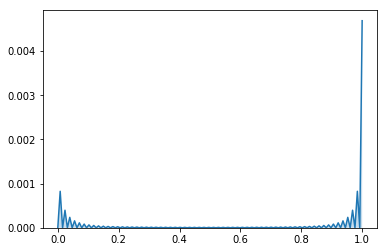

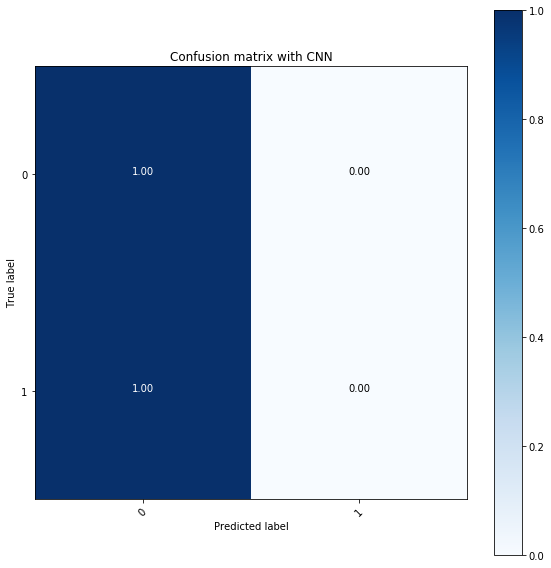

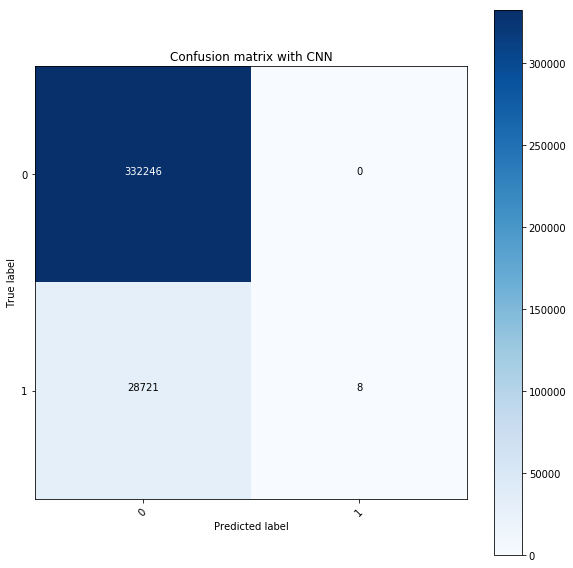

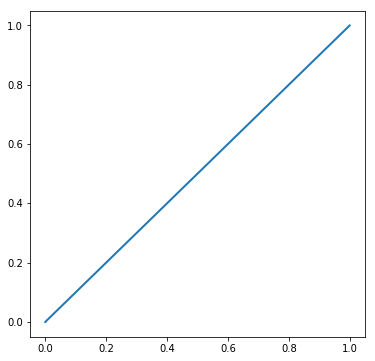

In [14]:
import p9_util
X_valid = p9_util_benchmark.pad_text(df_validate[p9_util_benchmark.TEXT_COLUMN], tokenizer, \
                                     dict_param_keras_cnn=p9_util_config.dict_param_keras_cnn)

y_= p9_util.display_class_performance(model, X_valid, df_validate.target.values.astype(int), is_binary=True, \
                                      y_pred=df_validate[MODEL_NAME].values.astype(int), \
                                      title="Confusion matrix with CNN", nb_classes=2)